# <center>Task3: Customer Clustering</center>

In [1]:
import csv
import copy
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [2]:
raw_df = pd.read_excel('dataset/Online_Retail.xlsx')

In [3]:
df = copy.deepcopy(raw_df)

# Exploration of the Dataset.

In [4]:
df.shape

(541909, 8)

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


<AxesSubplot:>

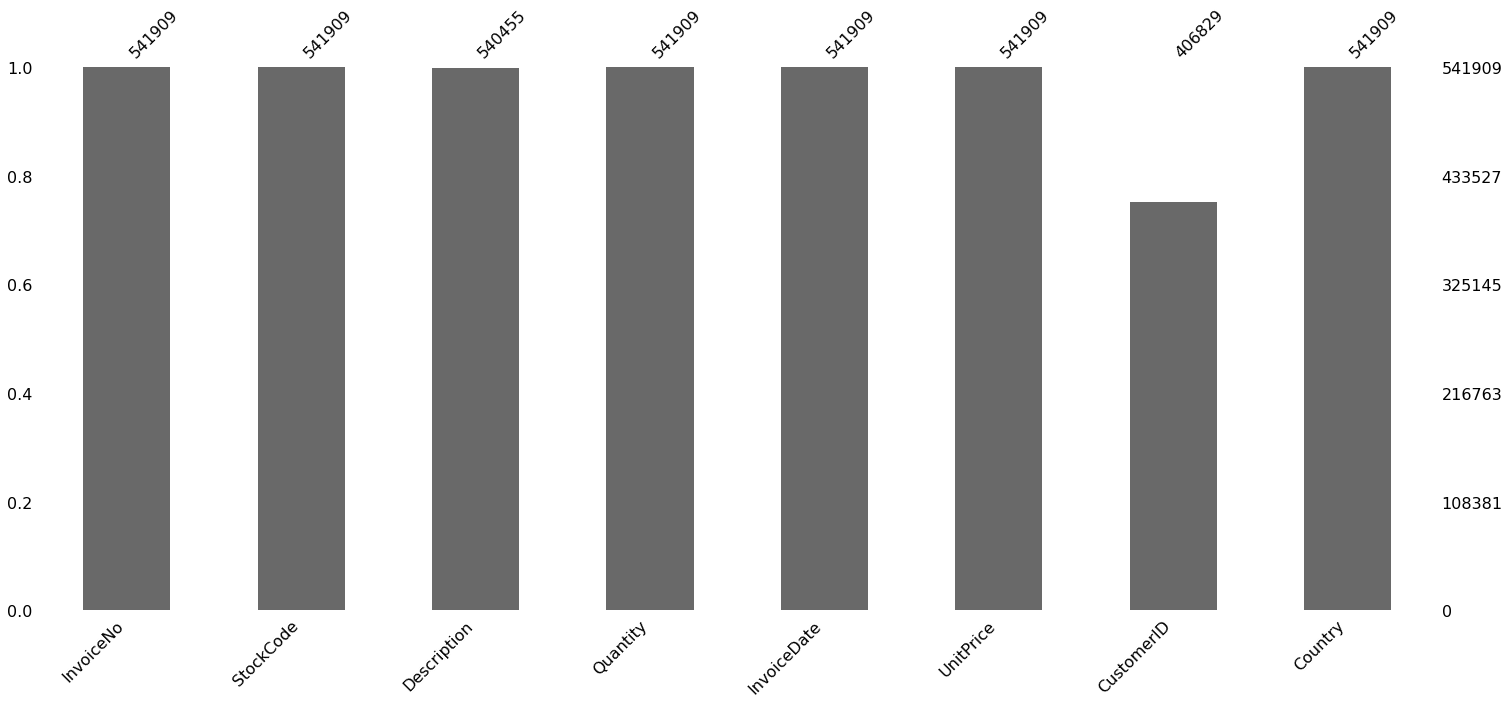

In [7]:
# Checking the missing values in the dataset.
print(df.isnull().sum())
missingno.bar(df)

#### We can observe that there are many missing values in the CustomerID column.

In [8]:
# Removing the null rows
df = df.dropna()
df.shape

(406829, 8)

<AxesSubplot:>

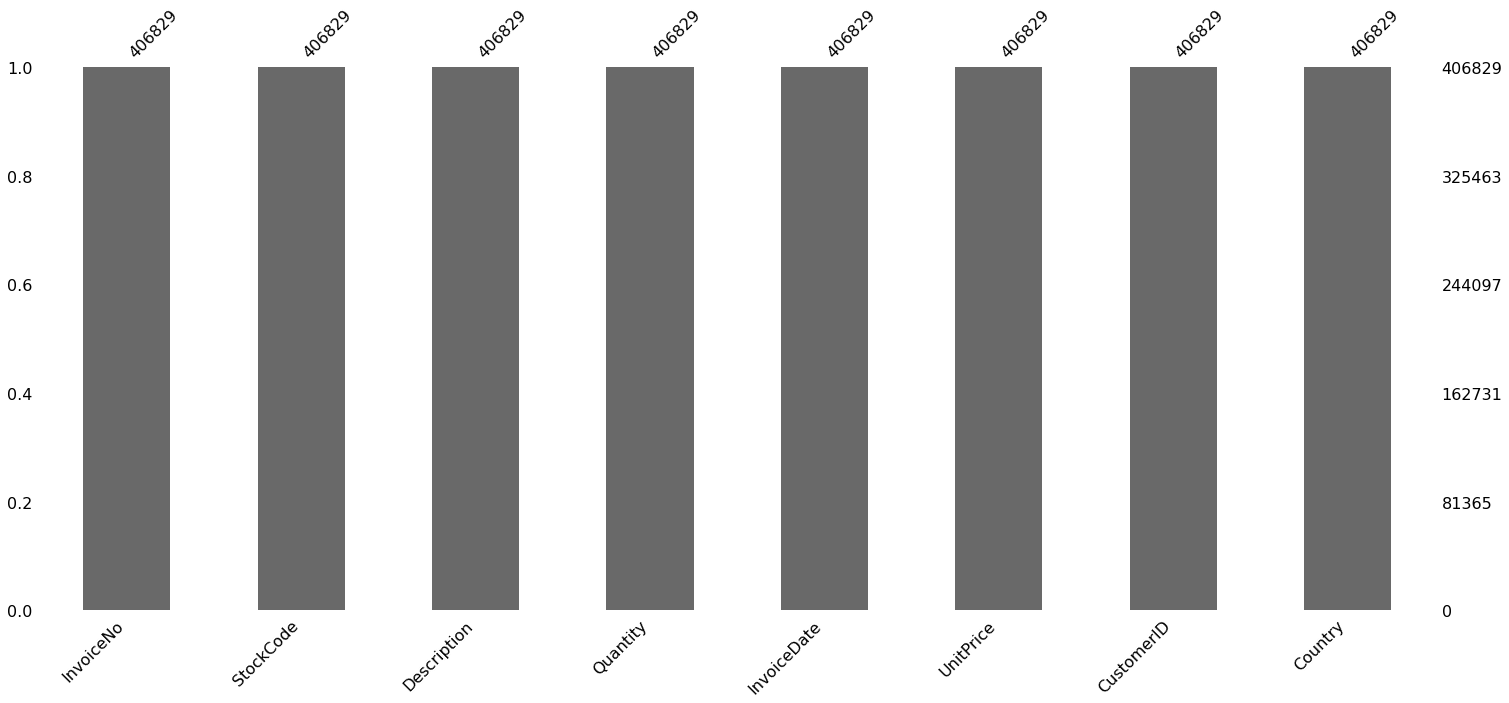

In [9]:
missingno.bar(df)

In [10]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [11]:
# Converting the Customer ID into string datatype column

In [12]:
df['CustomerID'] = df.CustomerID.astype(str)

# Data Preparation

In [13]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [14]:
# We need to get number of transactions by each customer.

df_freq_1 = df[['InvoiceNo', 'CustomerID']].groupby('CustomerID')
df_freq = df_freq_1['InvoiceNo'].count().reset_index().rename(columns={'InvoiceNo':'frequency'})
print(df_freq.shape)
df_freq.head(3)

(4372, 2)


,CustomerID,frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31


In [15]:
# We need to get total amount spent by each customer.

df['amount'] = df['Quantity']*df['UnitPrice']
df_amount_1 = df[['amount', 'CustomerID']].groupby('CustomerID')
df_amount = df_amount_1['amount'].sum().reset_index()
print(df_amount.shape)
df_amount.head(3)

(4372, 2)


,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24


In [16]:
merged_df = pd.merge(df_freq, df_amount, on='CustomerID', how='inner')
print(merged_df.shape)
merged_df.head(3)

(4372, 3)


,CustomerID,frequency,amount
0,12346.0,2,0.00
1,12347.0,182,4310.00
2,12348.0,31,1797.24


In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [18]:
# We need to calculate how active is the customer by finding the most recent purchase

# Converting the InvoiceDate column to pandas datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [19]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
amount                float64
dtype: object

In [20]:
biggest_date = max(df['InvoiceDate'])
df['day_difference'] = df.InvoiceDate.apply(lambda x: biggest_date-x)
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,day_difference
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00


In [21]:
df_rec_1 = df[['Description', 'CustomerID', 'day_difference']].groupby('CustomerID')['day_difference'].min()
df_rec = df_rec_1.reset_index()
df_rec['day_difference'] = df_rec.day_difference.dt.days.astype('int16')
df_rec.head(3)

,CustomerID,day_difference
0,12346.0,325
1,12347.0,1
2,12348.0,74


In [22]:
combined_df = merged_df.merge(df_rec, on='CustomerID', how='inner')
print(combined_df.shape)
combined_df.head(5)

(4372, 4)


,CustomerID,frequency,amount,day_difference
0,12346.0,2,0.00,325
1,12347.0,182,4310.00,1
2,12348.0,31,1797.24,74
3,12349.0,73,1757.55,18
4,12350.0,17,334.40,309


## Analysing Outliers

<AxesSubplot:>

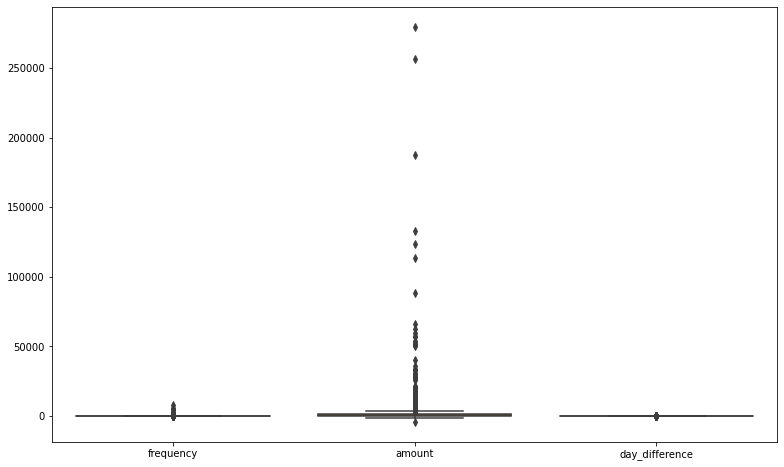

In [23]:
plt.figure(figsize = (13,8))
sns.boxplot(data=combined_df)

<b> We can se many outliers in the amount columns which is expected as some of the customers mus have spend a lot of amount in in the shopping.
KMeans is sensitive to outliers and hence we will remove these outliers to proceed with our analysis and model building.</b>

In [24]:
def remove_outliers(df=None):
    Q1 = df.amount.quantile(0.05)
    Q3 = df.amount.quantile(0.95)
    IQR = Q3 - Q1
    df = df[(df.amount >= Q1 - 1.5*IQR) & (df.amount <= Q3 + 1.5*IQR)]

    # Removing (statistical) outliers for Recency
    Q1 = df.day_difference.quantile(0.05)
    Q3 = df.day_difference.quantile(0.95)
    IQR = Q3 - Q1
    df = df[(df.day_difference >= Q1 - 1.5*IQR) & (df.day_difference <= Q3 + 1.5*IQR)]

    # Removing (statistical) outliers for Frequency
    Q1 = df.frequency.quantile(0.05)
    Q3 = df.frequency.quantile(0.95)
    IQR = Q3 - Q1
    df = df[(df.frequency >= Q1 - 1.5*IQR) & (df.frequency <= Q3 + 1.5*IQR)]\
    
    return df

In [25]:
outliers_removed_df = remove_outliers(df=combined_df)

In [26]:
outliers_removed_df.columns = ['CustomerID', 'frequency', 'amount', 'recency']
outliers_removed_df.head(3)

,CustomerID,frequency,amount,recency
0,12346.0,2,0.00,325
1,12347.0,182,4310.00,1
2,12348.0,31,1797.24,74


## Data Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
st_sc = StandardScaler()

In [29]:
scaled_df = pd.DataFrame(st_sc.fit_transform(outliers_removed_df[['frequency', 'amount', 'recency']]), columns=['frequency', 'amount', 'recency'])
print(scaled_df.shape)
scaled_df.head()

(4293, 3)


,frequency,amount,recency
0,-0.752888,-0.723738,2.301611
1,1.042467,1.731617,-0.906466
2,-0.463636,0.300128,-0.183658
3,-0.044720,0.277517,-0.738141
4,-0.603275,-0.533235,2.143188


# Model Building and Training

In [30]:
from sklearn.cluster import KMeans

In [ ]:
kmeans_model = KMeans()
kmeans_model.fit(scaled_df)

In [32]:
labels = kmeans_model.labels_
print(max(labels))

7


<b>we can see that by training our model on default parametres for K, we get 7 clusters. It is very difficult to segment our customers into 7 clusters. Hence, we have to find optimal number of clusters.</b>

In [33]:
inertia_list = list()
clusters_no_list = list(range(2,10))

for i in clusters_no_list:
    model = KMeans(n_clusters=i, init='k-means++', max_iter=50)
    model.fit(scaled_df)
    inertia_list.append(model.inertia_)

print('Inertia list is:', inertia_list)

Inertia list is: [7661.705869320751, 4433.586805811541, 3360.359293810966, 2802.926418558488, 2392.1289145429014, 2038.916661757908, 1825.4368459808568, 1656.6201910192895]


Text(0.5, 1.0, 'Elbow Curve Method')

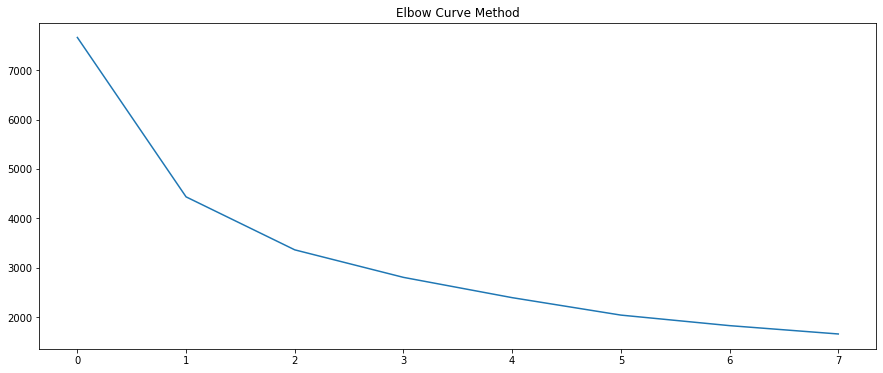

In [34]:
plt.figure(figsize = (15,6))
plt.plot(inertia_list)
plt.title('Elbow Curve Method')

In [ ]:
final_kmeans_model = KMeans(n_clusters=3, init='k-means++', random_state=None, copy_x=True, algorithm='lloyd', max_iter=50)
final_kmeans_model.fit(scaled_df)

In [36]:
print(max(final_kmeans_model.labels_))
print(set(final_kmeans_model.labels_))

2
{0, 1, 2}


<b> Now that we have got out customers, we have to visualise and assign these cluster to eac customer through CustomerID. This will help us to divide them into different groups. </b>

In [37]:
outliers_removed_df['Cluster'] = final_kmeans_model.labels_
outliers_removed_df.head(5)

,CustomerID,frequency,amount,recency,Cluster
0,12346.0,2,0.00,325,2
1,12347.0,182,4310.00,1,1
2,12348.0,31,1797.24,74,0
3,12349.0,73,1757.55,18,0
4,12350.0,17,334.40,309,2


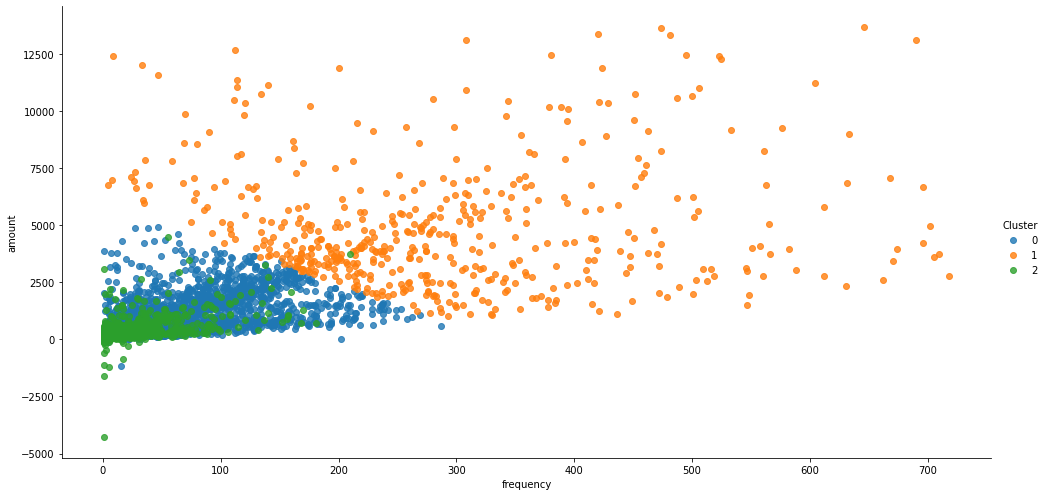

In [38]:
sns.lmplot(data=outliers_removed_df, x='frequency', y='amount', hue='Cluster', 
                   fit_reg=False, legend=True, legend_out=True, height=7, aspect=2)

<b>Conclusion: Based on Amount Spent and Frequency</b></br>
One of the best way of doing buisness is to attract new customers as well as keepin the existing one.
- Customers in Cluster 0 are very few in number with minimum amount of shopping and with minimum frequency. These customers might have started shopping at some other place.
- Customers in the cluster 1 are the most frequent customers who shop in the store with maximum spending amount.
- There are very large number of customers in the cluster 2 who seems to be quite frequent with medium range of spending power. As the number of cutomers is maximum, there can be some sort of discount and offers specifically planned for these customers.

<AxesSubplot:xlabel='frequency', ylabel='recency'>

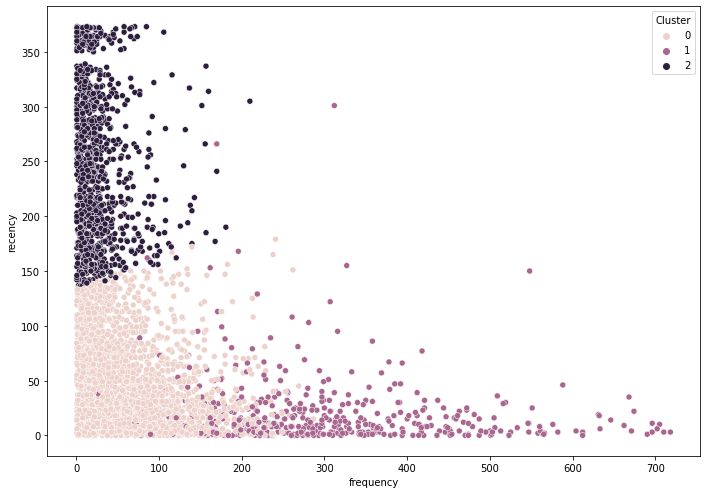

In [39]:
fig_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax,data=outliers_removed_df, x="frequency", y="recency", hue='Cluster')

<b>Conclusion: Based on Recency and Frequency </b>
- Customers in the cluster 0 are the least frequent customers who shop the least amount of time as most of them haven't done any shopping for more than 150 days at the store. Since, they are not the recent buyers, business should not bother about them at all.
- Customers in Cluster 1 have transacted maximum amount of times. However, this number is not too big. But all of these customers seems to be very regular in the shopping as the recent number of days for their last transaction is almoots less than an average of 15 days.
- Customers in Cluster 2 are the most recent customers with medium frequency of shopping in the stores.

# Hierarchical Clustering

In [40]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree

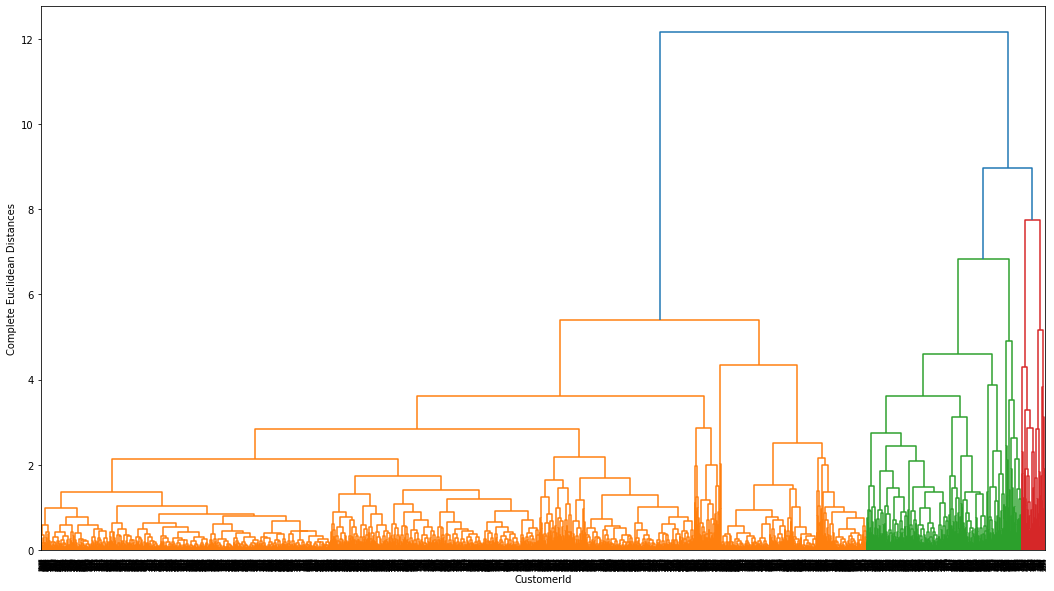

In [41]:
# Complete linkage
plt.figure(1, figsize = (18 ,10))
hierar_mergings_complete = linkage(scaled_df, method="complete", metric='euclidean')
dendrogram(hierar_mergings_complete)
plt.xlabel('CustomerId')
plt.ylabel('Complete Euclidean Distances')
plt.show()

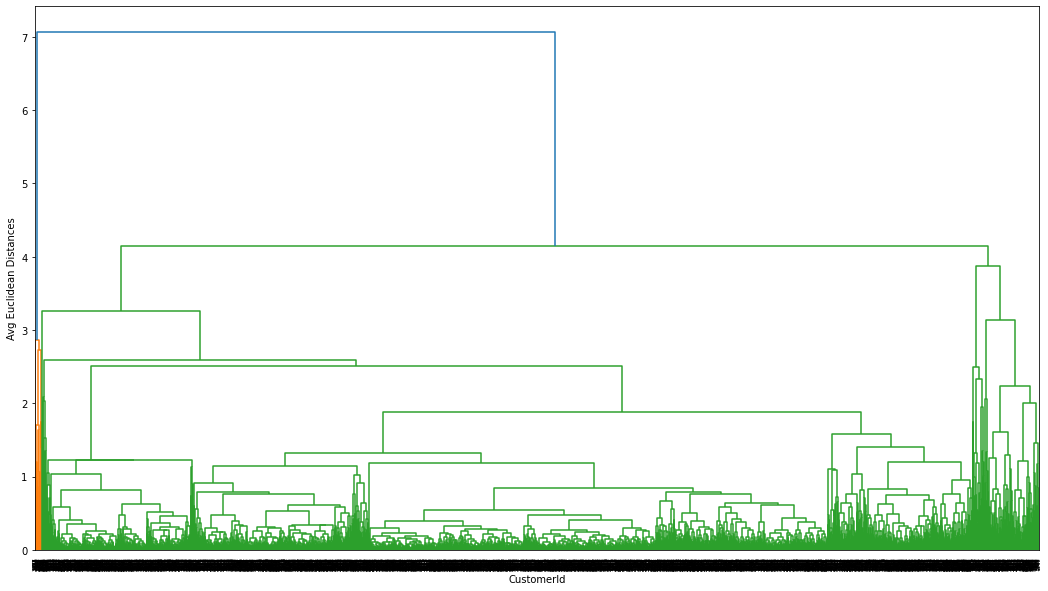

In [42]:
# Average linkage
plt.figure(1, figsize = (18 ,10))
hierar_mergings_avg = linkage(scaled_df, method="average", metric='euclidean')
dendrogram(hierar_mergings_avg)
plt.xlabel('CustomerId')
plt.ylabel('Avg Euclidean Distances')
plt.show()

In [43]:
labels_hierar = cut_tree(hierar_mergings_avg, n_clusters=3)
labels_hierar = labels_hierar.reshape(-1,)
outliers_removed_df['Hier_Cluster'] = labels_hierar
outliers_removed_df.head()

,CustomerID,frequency,amount,recency,Cluster,Hier_Cluster
0,12346.0,2,0.00,325,2,0
1,12347.0,182,4310.00,1,1,0
2,12348.0,31,1797.24,74,0,0
3,12349.0,73,1757.55,18,0,0
4,12350.0,17,334.40,309,2,0


<AxesSubplot:xlabel='Hier_Cluster', ylabel='amount'>

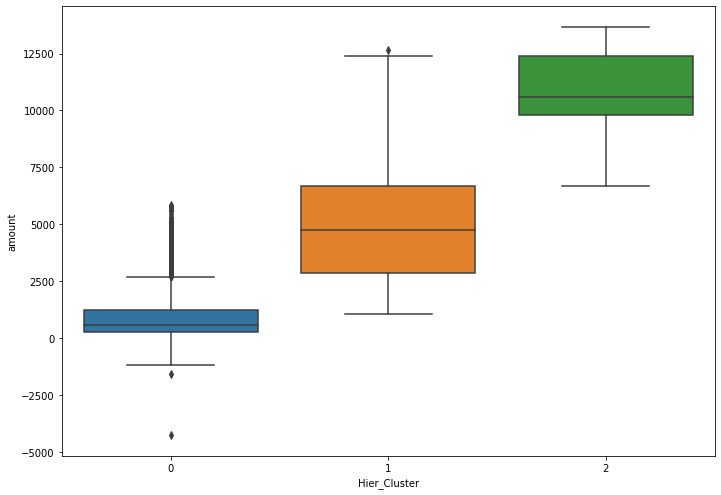

In [44]:
fig_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(ax=ax, x='Hier_Cluster', y='amount', data=outliers_removed_df)

<AxesSubplot:xlabel='Hier_Cluster', ylabel='frequency'>

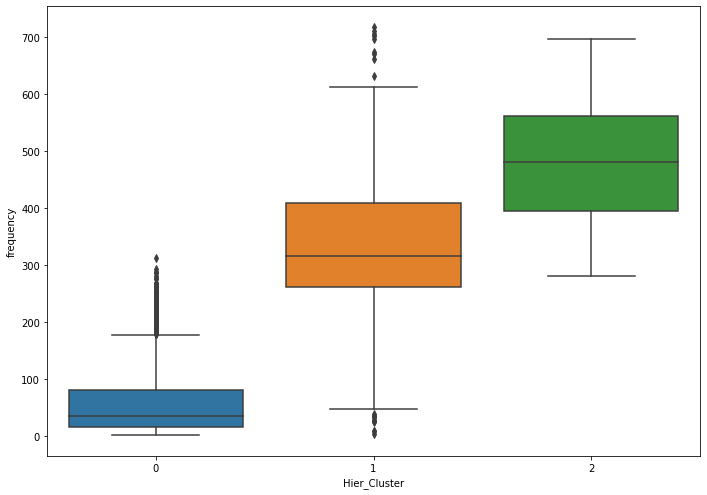

In [45]:
fig_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(ax=ax, x='Hier_Cluster', y='frequency', data=outliers_removed_df)

<AxesSubplot:xlabel='Hier_Cluster', ylabel='recency'>

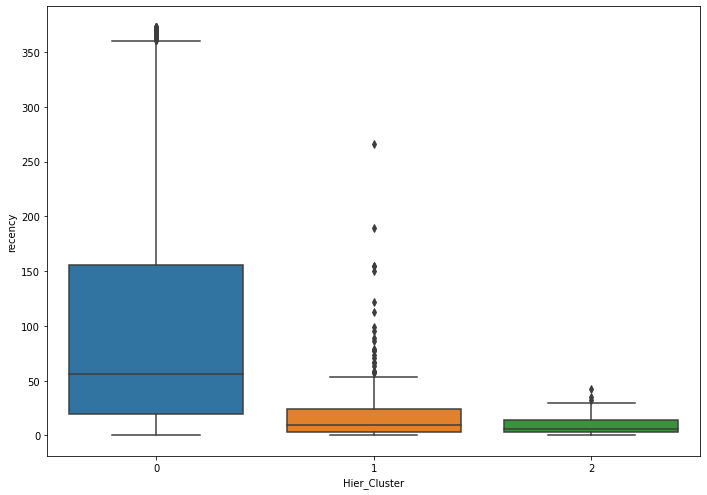

In [46]:
fig_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(ax=ax, x='Hier_Cluster', y='recency', data=outliers_removed_df)

<b>Conclusion:</b>
- Customers in cluster 0 are not of any business interest as they don't shop often. Their overall recency is very low against the customers in the other clusters.
- Customers in the cluster 2 spend most amount in the shopping and they shop very regularly. These customers holds importance for the business as they should be given more offers on the shoppings.

## Comparison Between KMeans and Hierarchical Clustering

- We have to identify an optimum number of K in KMeans clustering. Hierarchical Clustering on the other hand creates clusters Hierarchy without giving any specific number of clusters.
- It is difficult to predict the right number of K. However, with methods like Elbow Curve, we can guess optimum number of K. Hierarchical consumes a lot of resources and not a feasible option for datasets with large amount of samples. In our case, KMeans performed really well as it takes very less amount of time to form clusters as compared to the other technique.
- Analysisng and interpreting the results in KMeans is much more easier for us as we plot scatter plots showing us different segments of the cluster.

---

# <center>End of Notebook</center>

---